In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load baseline history
with open('../models/checkpoints/baseline_history.json') as f:
    history = json.load(f)

### Loss Curves 

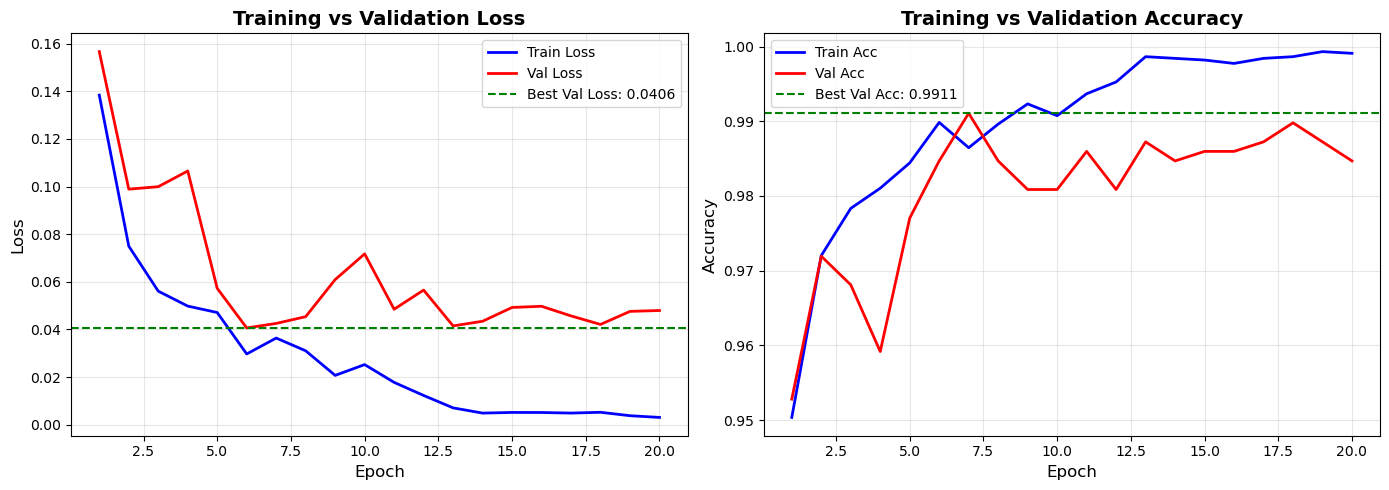

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs = range(1, len(history['train_loss']) + 1)

# Loss
axes[0].plot(epochs, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
axes[0].plot(epochs, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
axes[0].axhline(y=min(history['val_loss']), color='g', linestyle='--', 
                label=f'Best Val Loss: {min(history["val_loss"]):.4f}')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training vs Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Accuracy
axes[1].plot(epochs, history['train_acc'], 'b-', label='Train Acc', linewidth=2)
axes[1].plot(epochs, history['val_acc'], 'r-', label='Val Acc', linewidth=2)
axes[1].axhline(y=max(history['val_acc']), color='g', linestyle='--',
                label=f'Best Val Acc: {max(history["val_acc"]):.4f}')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/06_overfitting_check.png', dpi=300, bbox_inches='tight')
plt.show()

### Overfitting Analysis

In [3]:
train_loss = np.array(history['train_loss'])
val_loss = np.array(history['val_loss'])
train_acc = np.array(history['train_acc'])
val_acc = np.array(history['val_acc'])

# Last 5 epochs average
final_train_loss = train_loss[-5:].mean()
final_val_loss = val_loss[-5:].mean()
final_train_acc = train_acc[-5:].mean()
final_val_acc = val_acc[-5:].mean()

loss_gap = final_val_loss - final_train_loss
acc_gap = final_train_acc - final_val_acc

print("="*60)
print("OVERFITTING ANALYSIS")
print("="*60)
print(f"\n📊 Final Performance (last 5 epochs avg):")
print(f"   Train Loss: {final_train_loss:.4f}")
print(f"   Val Loss:   {final_val_loss:.4f}")
print(f"   Loss Gap:   {loss_gap:.4f}")
print(f"\n   Train Acc:  {final_train_acc:.4f}")
print(f"   Val Acc:    {final_val_acc:.4f}")
print(f"   Acc Gap:    {acc_gap:.4f}")

print(f"\n🔍 Overfitting Assessment:")
if loss_gap > 0.2 or acc_gap > 0.1:
    print("   ⚠️  SIGNIFICANT OVERFITTING DETECTED")
    print("   Recommendations:")
    print("   - Increase dropout (current: 0.3 → try 0.5)")
    print("   - Increase weight decay (current: 1e-4 → try 1e-3)")
    print("   - Add more data augmentation")
    print("   - Early stopping (use best val model)")
elif loss_gap > 0.1 or acc_gap > 0.05:
    print("   ⚠️  MILD OVERFITTING")
    print("   Model generalizes reasonably but could improve")
else:
    print("   ✅ NO SIGNIFICANT OVERFITTING")
    print("   Model generalizes well to validation set")

# Check if val_loss increases after certain epoch (classic overfitting sign)
best_epoch = np.argmin(val_loss) + 1
if best_epoch < len(val_loss) * 0.7:  # Best epoch in first 70%
    print(f"\n   ⚠️  Best val_loss at epoch {best_epoch}/{len(val_loss)}")
    print(f"   Consider early stopping or reducing epochs")

print("="*60)

OVERFITTING ANALYSIS

📊 Final Performance (last 5 epochs avg):
   Train Loss: 0.0044
   Val Loss:   0.0466
   Loss Gap:   0.0422

   Train Acc:  0.9986
   Val Acc:    0.9870
   Acc Gap:    0.0117

🔍 Overfitting Assessment:
   ✅ NO SIGNIFICANT OVERFITTING
   Model generalizes well to validation set

   ⚠️  Best val_loss at epoch 6/20
   Consider early stopping or reducing epochs
